In [1]:
from train import Model
from utils import read_image

In [3]:
weights_path = 'model_weights_bccaas.pth'

model = Model.load(weights_path, ['border'])
thresh = 0.7
for img in ['Test_shoulder_0054.jpg', 'Test_shoulder_0068.jpg', 'Test_shoulder_0071.jpg', '7a.jpg', '7b.jpg']:
    image = read_image(img)
    labels, boxes, scores = model.predict(image)
    print(any(scores > thresh))

False
False
False
False
False


In [5]:
model = Model.load(weights_path, ['border'])

dataset_dir = '../all_border_dataset_2000_annotations_split'

test_dataset = f'{dataset_dir}/test'

for img in ['Test_shoulder_0054.jpg', 'Test_shoulder_0068.jpg', 'Test_shoulder_0071.jpg']:
# for img in ['border_Img_000310.jpg', 'border_Img_000312.jpg', 'border_Img_000314.jpg']:
# for img in ['clean_Img_0001.jpg', 'clean_Img_0002.jpg', 'clean_Img_0003.jpg', 'clean_Img_0004.jpg', 'clean_Img_0005.jpg']:
#     img = f'{test_dataset}/{img}'
# for img in ['clean_Img_000631.jpg']:
    image = read_image(img)
    print(img)
    labels, boxes, scores = model.predict(image)
    for score in scores:
        if score > 0.5:
            print(score)

Test_shoulder_0054.jpg
tensor(0.6261)
tensor(0.5845)
Test_shoulder_0068.jpg
tensor(0.6482)
tensor(0.5051)
Test_shoulder_0071.jpg
tensor(0.6819)


| img | scores > 0.5, bccaas env | scores > 0.5, original env |
| --------- | :--------- | ---------: |
| Test_shoulder_0054.png | 0.7301, 0.6493 | 0.6988, 0.5580, 0.5329 |
| Test_shoulder_0068.png | 0.7427, 0.5594 | 0.7427, 0.5594 |
| Test_shoulder_0071.png | 0.7795, 0.5950, 0.5614 | 0.7870, 0.5967, 0.5609, 0.5241 |

In [7]:
def show_labeled_image(image, boxes, labels=None):
    """Show the image along with the specified boxes around detected objects.
    Also displays each box's label if a list of labels is provided.
    :param image: The image to plot. If the image is a normalized
        torch.Tensor object, it will automatically be reverse-normalized
        and converted to a PIL image for plotting.
    :type image: numpy.ndarray or torch.Tensor
    :param boxes: A torch tensor of size (N, 4) where N is the number
        of boxes to plot, or simply size 4 if N is 1.
    :type boxes: torch.Tensor
    :param labels: (Optional) A list of size N giving the labels of
            each box (labels[i] corresponds to boxes[i]). Defaults to None.
    :type labels: torch.Tensor or None
    **Example**::
        >>> from detecto.core import Model
        >>> from detecto.utils import read_image
        >>> from detecto.visualize import show_labeled_image
        >>> model = Model.load('model_weights.pth', ['tick', 'gate'])
        >>> image = read_image('image.jpg')
        >>> labels, boxes, scores = model.predict(image)
        >>> show_labeled_image(image, boxes, labels)
    """

    fig, ax = plt.subplots(1)
    # If the image is already a tensor, convert it back to a PILImage
    # and reverse normalize it
    if isinstance(image, torch.Tensor):
        image = reverse_normalize(image)
        image = transforms.ToPILImage()(image)
    ax.imshow(image)

    # Show a single box or multiple if provided
    if boxes.ndim == 1:
        boxes = boxes.view(1, 4)

    if labels is not None and not is_iterable(labels):
        labels = [labels]

    # Plot each box
    for i in range(boxes.shape[0]):
        box = boxes[i]
        width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
        initial_pos = (box[0].item(), box[1].item())
        rect = patches.Rectangle(initial_pos,  width, height, linewidth=1,
                                 edgecolor='r', facecolor='none')
        if labels:
            ax.text(box[0] + 5, box[1] - 5, '{}'.format(labels[i]), color='red')

        ax.add_patch(rect)

    plt.show()

In [8]:
import matplotlib.pyplot as plt
import torch
from utils import is_iterable
import matplotlib.patches as patches

clean_Img_000631.jpg


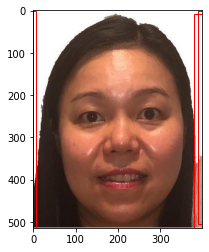

In [16]:
model = Model.load(weights_path, ['border'])

# for img in ['Test_shoulder_0054.png', 'Test_shoulder_0068.png', 'Test_shoulder_0071.png']:
# for img in ['clean_Img_0001.jpg', 'clean_Img_0002.jpg', 'clean_Img_0003.jpg', 'clean_Img_0004.jpg', 'clean_Img_0005.jpg']:
for img in ['clean_Img_000631.jpg']:
    image = read_image(img)
    print(img)
    labels, boxes, scores = model.predict(image)
    filtered_boxes = []
    filtered_labels = []
    for i in range(len(scores)):
        if scores[i] > 0.7 :
            filtered_boxes.append(boxes[i].tolist())
            filtered_labels.append(labels[i])
    if filtered_boxes:
        show_labeled_image(image, torch.Tensor(filtered_boxes))  # Plot predictions on a single image